# 마케팅정보 EDA

In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 설치된 폰트 목록을 갱신하고, 'NanumGothic' 폰트를 기본 폰트로 설정합니다.
font_path = 'C:/Windows/Fonts/NanumGothic.ttf' 
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

import sys
sys.path.append('../utils')

In [2]:
from sklearn.pipeline import Pipeline
from sklearn import set_config
from preprocessing import (
    DateElapsedTransformer, NumericFeaturePreprocessor, ObjectFeaturePreprocessor, NumericTypeOptimizer,
)

pre_optimizer = NumericTypeOptimizer(mode='pre')
date_transformer = DateElapsedTransformer()
numeric_transformer = NumericFeaturePreprocessor()
object_transformer = ObjectFeaturePreprocessor()
post_optimizer = NumericTypeOptimizer(mode='post')

preprocessing_pipeline = Pipeline([
    ('pre_optimizer', pre_optimizer),
    ('object', object_transformer),
    ('date', date_transformer),
    ('numeric', numeric_transformer),
    ('post_optimizer', post_optimizer),
])

# Set display configuration to visualize the pipeline
set_config(display='diagram')

# Display the pipeline
preprocessing_pipeline

Pipeline(steps=[('pre_optimizer', NumericTypeOptimizer(mode='pre')),
                ('object',
                 ObjectFeaturePreprocessor(exclude_columns=['ID', 'Segment'])),
                ('date',
                 DateElapsedTransformer(base_date=Timestamp('2019-01-01 00:00:00'),
                                        exclude_columns=['ID', 'Segment',
                                                         '기준년월'])),
                ('numeric',
                 NumericFeaturePreprocessor(exclude_columns=['기준년월'])),
                ('post_optimizer', NumericTypeOptimizer())])

In [5]:
from sklearn.preprocessing import LabelEncoder
from data_loader import load_data

marketing_df, marketing_test_df = load_data("7.마케팅정보")

X = marketing_df.drop(columns=['ID', '기준년월'])
X = preprocessing_pipeline.fit_transform(X)
X.info()

✅ File: ../../dataset/train/7.마케팅정보\201807_train_마케팅정보.parquet Completed!
✅ File: ../../dataset/train/7.마케팅정보\201808_train_마케팅정보.parquet Completed!
✅ File: ../../dataset/train/7.마케팅정보\201809_train_마케팅정보.parquet Completed!
✅ File: ../../dataset/train/7.마케팅정보\201810_train_마케팅정보.parquet Completed!
✅ File: ../../dataset/train/7.마케팅정보\201811_train_마케팅정보.parquet Completed!
✅ File: ../../dataset/train/7.마케팅정보\201812_train_마케팅정보.parquet Completed!
🔹 Shape : (2400000, 64)

✅ File: ../../dataset/test/7.마케팅정보\201807_test_마케팅정보.parquet Completed!
✅ File: ../../dataset/test/7.마케팅정보\201808_test_마케팅정보.parquet Completed!
✅ File: ../../dataset/test/7.마케팅정보\201809_test_마케팅정보.parquet Completed!
✅ File: ../../dataset/test/7.마케팅정보\201810_test_마케팅정보.parquet Completed!
✅ File: ../../dataset/test/7.마케팅정보\201811_test_마케팅정보.parquet Completed!
✅ File: ../../dataset/test/7.마케팅정보\201812_test_마케팅정보.parquet Completed!
🔹 Shape : (600000, 64)
Numeric Type Optimizer Transforming...
🧠 [mode=pre] 메모리 최적화: 1520.89 MB → 55

In [5]:
market_df = optimize_numeric_types(market_df, verbose=True)
market_test_df = optimize_numeric_types(market_test_df, verbose=True)

🔹 메모리 사용량: 1697.13 MB → 726.67 MB  (57.2% 감소)
🔹 메모리 사용량: 423.14 MB → 180.53 MB  (57.3% 감소)


In [6]:
market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 64 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   기준년월               uint32
 1   ID                 object
 2   컨택건수_카드론_TM_B0M    uint8 
 3   컨택건수_리볼빙_TM_B0M    uint8 
 4   컨택건수_CA_TM_B0M     uint8 
 5   컨택건수_이용유도_TM_B0M   uint8 
 6   컨택건수_신용발급_TM_B0M   uint8 
 7   컨택건수_부대서비스_TM_B0M  uint8 
 8   컨택건수_포인트소진_TM_B0M  uint8 
 9   컨택건수_보험_TM_B0M     uint8 
 10  컨택건수_카드론_LMS_B0M   uint8 
 11  컨택건수_CA_LMS_B0M    uint8 
 12  컨택건수_리볼빙_LMS_B0M   uint8 
 13  컨택건수_이용유도_LMS_B0M  uint8 
 14  컨택건수_카드론_EM_B0M    uint8 
 15  컨택건수_CA_EM_B0M     uint8 
 16  컨택건수_리볼빙_EM_B0M    uint8 
 17  컨택건수_이용유도_EM_B0M   uint8 
 18  컨택건수_카드론_청구서_B0M   uint8 
 19  컨택건수_CA_청구서_B0M    uint8 
 20  컨택건수_리볼빙_청구서_B0M   uint8 
 21  컨택건수_이용유도_청구서_B0M  uint8 
 22  컨택건수_카드론_인터넷_B0M   uint8 
 23  컨택건수_CA_인터넷_B0M    uint8 
 24  컨택건수_리볼빙_인터넷_B0M   uint8 
 25  컨택건수_이용유도_인터넷_B0M  uint8 
 26  컨택건수_카드론_당사앱_B

In [7]:
object_columns = market_df.select_dtypes(include=['object']).columns
object_columns

Index(['ID', '캠페인접촉건수_R12M', '캠페인접촉일수_R12M'], dtype='object')

In [8]:
object_unique_values = {col: market_df[col].unique() for col in object_columns if col != 'ID'}
object_unique_values

{'캠페인접촉건수_R12M': array(['1회 이상', '15회 이상', '10회 이상', '5회 이상', '20회 이상', '25회 이상'],
       dtype=object),
 '캠페인접촉일수_R12M': array(['1일 이상', '10일 이상', '5일 이상', '15일 이상', '20일 이상'], dtype=object)}

In [10]:
for col in object_unique_values:
    market_df[col] = market_df[col].astype('category')
    market_test_df[col] = market_test_df[col].astype('category')

In [11]:
int_columns = market_df.select_dtypes(include=['integer']).columns
int_columns

Index(['기준년월', '컨택건수_카드론_TM_B0M', '컨택건수_리볼빙_TM_B0M', '컨택건수_CA_TM_B0M',
       '컨택건수_이용유도_TM_B0M', '컨택건수_신용발급_TM_B0M', '컨택건수_부대서비스_TM_B0M',
       '컨택건수_포인트소진_TM_B0M', '컨택건수_보험_TM_B0M', '컨택건수_카드론_LMS_B0M',
       '컨택건수_CA_LMS_B0M', '컨택건수_리볼빙_LMS_B0M', '컨택건수_이용유도_LMS_B0M',
       '컨택건수_카드론_EM_B0M', '컨택건수_CA_EM_B0M', '컨택건수_리볼빙_EM_B0M',
       '컨택건수_이용유도_EM_B0M', '컨택건수_카드론_청구서_B0M', '컨택건수_CA_청구서_B0M',
       '컨택건수_리볼빙_청구서_B0M', '컨택건수_이용유도_청구서_B0M', '컨택건수_카드론_인터넷_B0M',
       '컨택건수_CA_인터넷_B0M', '컨택건수_리볼빙_인터넷_B0M', '컨택건수_이용유도_인터넷_B0M',
       '컨택건수_카드론_당사앱_B0M', '컨택건수_CA_당사앱_B0M', '컨택건수_리볼빙_당사앱_B0M',
       '컨택건수_이용유도_당사앱_B0M', '컨택건수_카드론_TM_R6M', '컨택건수_CA_TM_R6M',
       '컨택건수_리볼빙_TM_R6M', '컨택건수_이용유도_TM_R6M', '컨택건수_신용발급_TM_R6M',
       '컨택건수_부대서비스_TM_R6M', '컨택건수_포인트소진_TM_R6M', '컨택건수_보험_TM_R6M',
       '컨택건수_카드론_LMS_R6M', '컨택건수_CA_LMS_R6M', '컨택건수_리볼빙_LMS_R6M',
       '컨택건수_이용유도_LMS_R6M', '컨택건수_카드론_EM_R6M', '컨택건수_CA_EM_R6M',
       '컨택건수_리볼빙_EM_R6M', '컨택건수_이용유도_EM_R6M', '컨택건수_카드론_청구서_R6M',
   

In [12]:
int_unique_values = {col: market_df[col].unique() for col in int_columns if col != '기준년월'}
int_unique_values

{'컨택건수_카드론_TM_B0M': array([0, 3, 4, 2], dtype=uint8),
 '컨택건수_리볼빙_TM_B0M': array([0, 1, 2], dtype=uint8),
 '컨택건수_CA_TM_B0M': array([0], dtype=uint8),
 '컨택건수_이용유도_TM_B0M': array([0, 2, 3], dtype=uint8),
 '컨택건수_신용발급_TM_B0M': array([0, 1], dtype=uint8),
 '컨택건수_부대서비스_TM_B0M': array([0, 1], dtype=uint8),
 '컨택건수_포인트소진_TM_B0M': array([0], dtype=uint8),
 '컨택건수_보험_TM_B0M': array([0, 1], dtype=uint8),
 '컨택건수_카드론_LMS_B0M': array([0, 1], dtype=uint8),
 '컨택건수_CA_LMS_B0M': array([0, 2, 1], dtype=uint8),
 '컨택건수_리볼빙_LMS_B0M': array([0, 1], dtype=uint8),
 '컨택건수_이용유도_LMS_B0M': array([2, 0, 3, 1], dtype=uint8),
 '컨택건수_카드론_EM_B0M': array([0, 1], dtype=uint8),
 '컨택건수_CA_EM_B0M': array([0], dtype=uint8),
 '컨택건수_리볼빙_EM_B0M': array([0], dtype=uint8),
 '컨택건수_이용유도_EM_B0M': array([13,  0,  3,  1,  7,  8,  2,  9, 10, 12,  6,  4,  5, 11],
       dtype=uint8),
 '컨택건수_카드론_청구서_B0M': array([0, 1], dtype=uint8),
 '컨택건수_CA_청구서_B0M': array([0, 2], dtype=uint8),
 '컨택건수_리볼빙_청구서_B0M': array([0], dtype=uint8),
 '컨택건수_이용유도_청구서

In [13]:
# 개수가 0개이거나 1개인 column을 제거
drop_cols = [col for col in int_unique_values if market_df[col].nunique() <= 1]
print(f"column 수 : {len(drop_cols)}")
drop_cols

column 수 : 22


['컨택건수_CA_TM_B0M',
 '컨택건수_포인트소진_TM_B0M',
 '컨택건수_CA_EM_B0M',
 '컨택건수_리볼빙_EM_B0M',
 '컨택건수_리볼빙_청구서_B0M',
 '컨택건수_카드론_인터넷_B0M',
 '컨택건수_CA_인터넷_B0M',
 '컨택건수_리볼빙_인터넷_B0M',
 '컨택건수_카드론_당사앱_B0M',
 '컨택건수_CA_당사앱_B0M',
 '컨택건수_리볼빙_당사앱_B0M',
 '컨택건수_CA_EM_R6M',
 '컨택건수_리볼빙_EM_R6M',
 '컨택건수_리볼빙_청구서_R6M',
 '컨택건수_카드론_인터넷_R6M',
 '컨택건수_CA_인터넷_R6M',
 '컨택건수_리볼빙_인터넷_R6M',
 '컨택건수_카드론_당사앱_R6M',
 '컨택건수_CA_당사앱_R6M',
 '컨택건수_리볼빙_당사앱_R6M',
 '컨택건수_FDS_B0M',
 '컨택건수_FDS_R6M']

In [14]:
for col in drop_cols:
    market_df = market_df.drop(col, axis=1)
    market_test_df= market_test_df.drop(col, axis=1)

In [15]:
market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 42 columns):
 #   Column             Dtype   
---  ------             -----   
 0   기준년월               uint32  
 1   ID                 object  
 2   컨택건수_카드론_TM_B0M    uint8   
 3   컨택건수_리볼빙_TM_B0M    uint8   
 4   컨택건수_이용유도_TM_B0M   uint8   
 5   컨택건수_신용발급_TM_B0M   uint8   
 6   컨택건수_부대서비스_TM_B0M  uint8   
 7   컨택건수_보험_TM_B0M     uint8   
 8   컨택건수_카드론_LMS_B0M   uint8   
 9   컨택건수_CA_LMS_B0M    uint8   
 10  컨택건수_리볼빙_LMS_B0M   uint8   
 11  컨택건수_이용유도_LMS_B0M  uint8   
 12  컨택건수_카드론_EM_B0M    uint8   
 13  컨택건수_이용유도_EM_B0M   uint8   
 14  컨택건수_카드론_청구서_B0M   uint8   
 15  컨택건수_CA_청구서_B0M    uint8   
 16  컨택건수_이용유도_청구서_B0M  uint8   
 17  컨택건수_이용유도_인터넷_B0M  uint8   
 18  컨택건수_이용유도_당사앱_B0M  uint8   
 19  컨택건수_카드론_TM_R6M    uint8   
 20  컨택건수_CA_TM_R6M     uint8   
 21  컨택건수_리볼빙_TM_R6M    uint8   
 22  컨택건수_이용유도_TM_R6M   uint8   
 23  컨택건수_신용발급_TM_R6M   uint8   
 24  컨택건수_부대서비스_TM_R6M  uint8

In [16]:
market_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 42 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   기준년월               600000 non-null  uint32  
 1   ID                 600000 non-null  object  
 2   컨택건수_카드론_TM_B0M    600000 non-null  uint8   
 3   컨택건수_리볼빙_TM_B0M    600000 non-null  uint8   
 4   컨택건수_이용유도_TM_B0M   600000 non-null  uint8   
 5   컨택건수_신용발급_TM_B0M   600000 non-null  uint8   
 6   컨택건수_부대서비스_TM_B0M  600000 non-null  uint8   
 7   컨택건수_보험_TM_B0M     600000 non-null  uint8   
 8   컨택건수_카드론_LMS_B0M   600000 non-null  uint8   
 9   컨택건수_CA_LMS_B0M    600000 non-null  uint8   
 10  컨택건수_리볼빙_LMS_B0M   600000 non-null  uint8   
 11  컨택건수_이용유도_LMS_B0M  600000 non-null  uint8   
 12  컨택건수_카드론_EM_B0M    600000 non-null  uint8   
 13  컨택건수_이용유도_EM_B0M   600000 non-null  uint8   
 14  컨택건수_카드론_청구서_B0M   600000 non-null  uint8   
 15  컨택건수_CA_청구서_B0M    600000 non-null

## Feature Selection

In [17]:
segment_df = pd.read_parquet('../dataset/train/member.parquet', engine='fastparquet')
segment_df = segment_df[['ID', '기준년월', 'Segment']]

market_df = market_df.merge(segment_df, on=['ID', '기준년월'], how='left')

In [18]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

def get_feature_importance(X, y, importance_type='gain', plot_top_n=30):
    """
    LightGBM을 이용해 Feature Importance를 계산하고, 상위 feature를 시각화합니다.
    
    Parameters:
    - X (pd.DataFrame): feature 데이터
    - y (pd.Series or np.array): target 데이터
    - importance_type (str): 'gain' 또는 'split' (중요도 기준)
    - plot_top_n (int): 중요도가 높은 feature 몇 개를 plot할지
    - random_state (int): seed 고정

    Returns:
    - feature_importance_df (pd.DataFrame): feature importance 데이터프레임
    - model (lgb.Booster): 학습된 LightGBM 모델
    """

    # LightGBM 데이터셋 구성
    lgb_train = lgb.Dataset(X, label=y)

    # LightGBM 기본 파라미터 (가볍게 학습)
    params = {
        'objective': 'multiclass',   # 다중 클래스 분류
        'num_class': 5,  # 클래스 수 자동 지정
        'boosting_type': 'gbdt',
        'metric': 'multi_logloss',   # 다중 클래스 로지 손실
        'verbosity': -1,
        'seed': 42,
        'learning_rate': 0.05,
        'num_leaves': 31,
        'min_data_in_leaf': 20
    }

    # 빠르게 학습 (에포크 100회로 제한)
    model = lgb.train(params, lgb_train, num_boost_round=100)

    # Feature Importance 가져오기
    importance = model.feature_importance(importance_type=importance_type)
    feature_names = X.columns

    feature_importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importance
    }).sort_values('importance', ascending=False)

    # 시각화
    top_features = feature_importance_df.head(plot_top_n)
    
    plt.figure(figsize=(10, max(6, plot_top_n // 2)))
    plt.barh(top_features['feature'][::-1], top_features['importance'][::-1])
    plt.xlabel('Importance')
    plt.title(f'Top {plot_top_n} Feature Importance ({importance_type})')
    plt.tight_layout()
    plt.show()

    return feature_importance_df, model

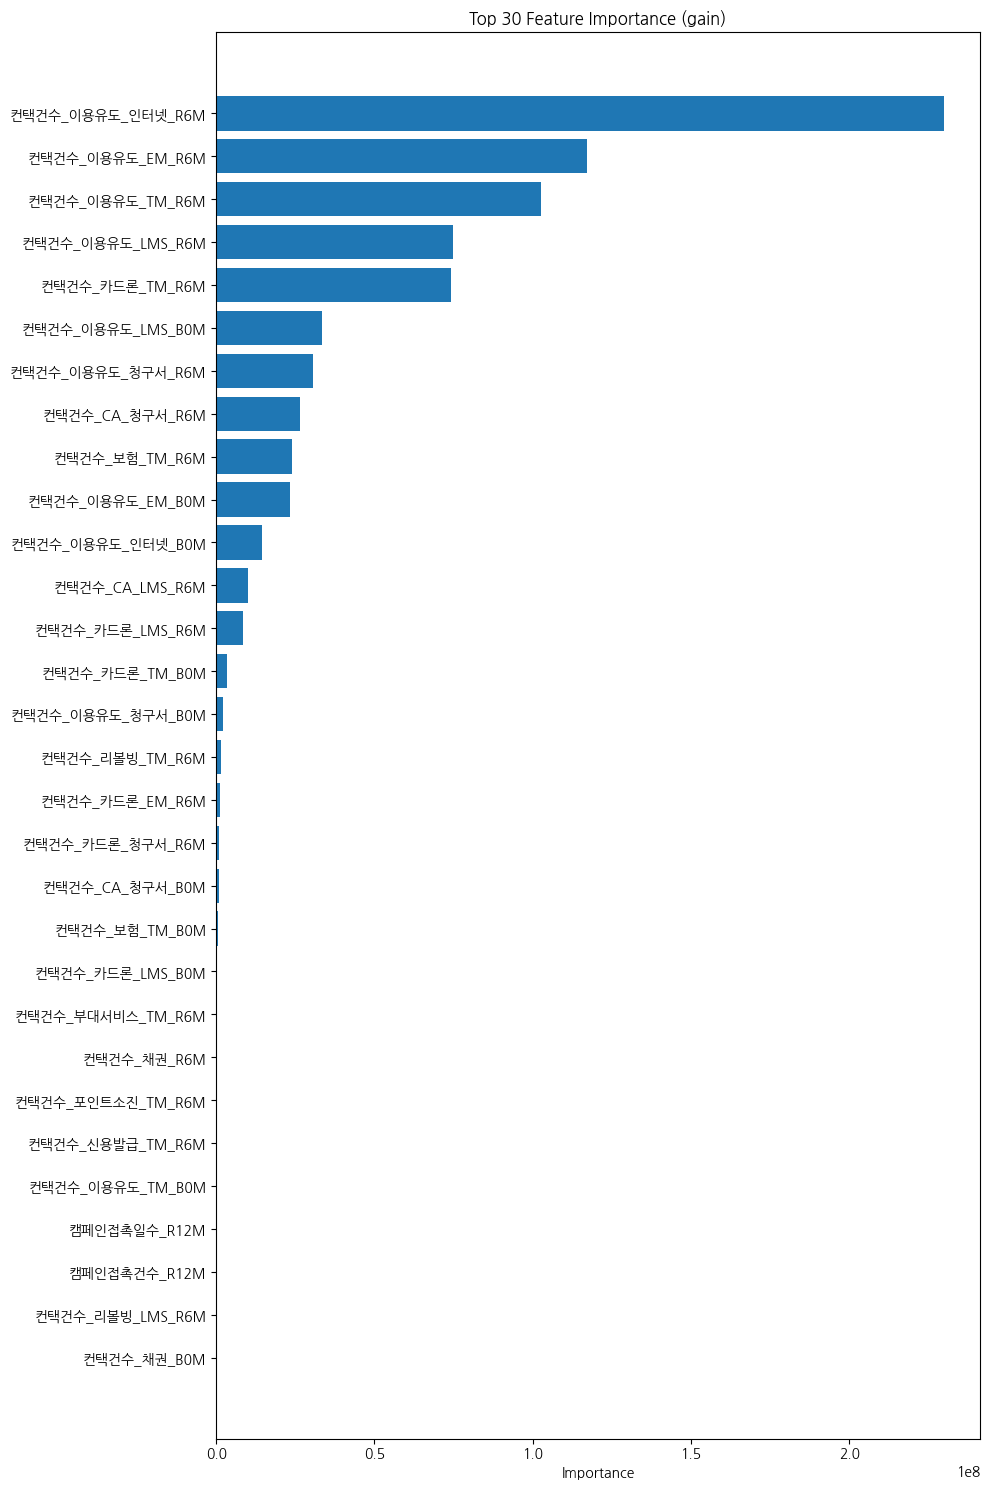

In [19]:
X = market_df.drop(columns=['ID', '기준년월', 'Segment'])

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(market_df['Segment'])

importance_df, model = get_feature_importance(X, y, importance_type='gain', plot_top_n=30)

In [20]:
def select_top_features(importance_df, X, top_percent=0.3):
    """
    중요도 데이터프레임에서 상위 top_percent 비율만큼 feature를 선택하여 데이터셋 추출

    Parameters:
    - importance_df (pd.DataFrame): feature와 importance를 가진 데이터프레임
    - X (pd.DataFrame): 원본 feature 데이터셋
    - top_percent (float): 상위 몇 %를 선택할지 (기본 30%)

    Returns:
    - X_top (pd.DataFrame): 상위 feature만 선택된 데이터프레임
    - selected_features (list): 선택된 feature 리스트
    """
    n_features = int(len(importance_df) * top_percent)
    selected_features = importance_df['feature'].iloc[:n_features].tolist()
    X_top = X[selected_features]
    return X_top, selected_features

In [22]:
X_top, selected_features = select_top_features(importance_df, X, top_percent=0.4)
print(f"🔹 선택된 feature 수: {len(selected_features)}")
print(f"🔹 선택된 feature: {selected_features}")

🔹 선택된 feature 수: 16
🔹 선택된 feature: ['컨택건수_이용유도_인터넷_R6M', '컨택건수_이용유도_EM_R6M', '컨택건수_이용유도_TM_R6M', '컨택건수_이용유도_LMS_R6M', '컨택건수_카드론_TM_R6M', '컨택건수_이용유도_LMS_B0M', '컨택건수_이용유도_청구서_R6M', '컨택건수_CA_청구서_R6M', '컨택건수_보험_TM_R6M', '컨택건수_이용유도_EM_B0M', '컨택건수_이용유도_인터넷_B0M', '컨택건수_CA_LMS_R6M', '컨택건수_카드론_LMS_R6M', '컨택건수_카드론_TM_B0M', '컨택건수_이용유도_청구서_B0M', '컨택건수_리볼빙_TM_R6M']


In [23]:
def plot_feature_correlation(X_top, threshold=0.8):
    """
    상위 feature들 간의 상관계수 행렬을 시각화하고, 
    threshold 이상인 feature쌍을 출력

    Parameters:
    - X_top (pd.DataFrame): 상위 feature 데이터프레임
    - threshold (float): 높은 상관관계로 간주할 기준
    """
    # 수치치형 feature만 선택
    numeric_features = X_top.select_dtypes(include=['number'])
    corr_matrix = numeric_features.corr()
    print(" 상관계수 행렬 생성 완료..!")

    # 상관관계 히트맵 그리기
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix of Top Features')
    plt.show()

    # threshold 이상인 feature 쌍 출력
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

    if high_corr_pairs:
        print(f"\n상관계수 {threshold} 이상인 feature 쌍:")
        for f1, f2, corr in sorted(high_corr_pairs, key=lambda x: -abs(x[2])):
            print(f"🔹{f1} vs {f2}: 상관계수 = {corr:.3f}")
    else:
        print(f"\n상관계수 {threshold} 이상인 feature 쌍이 없습니다.")
    
    return high_corr_pairs

 상관계수 행렬 생성 완료..!


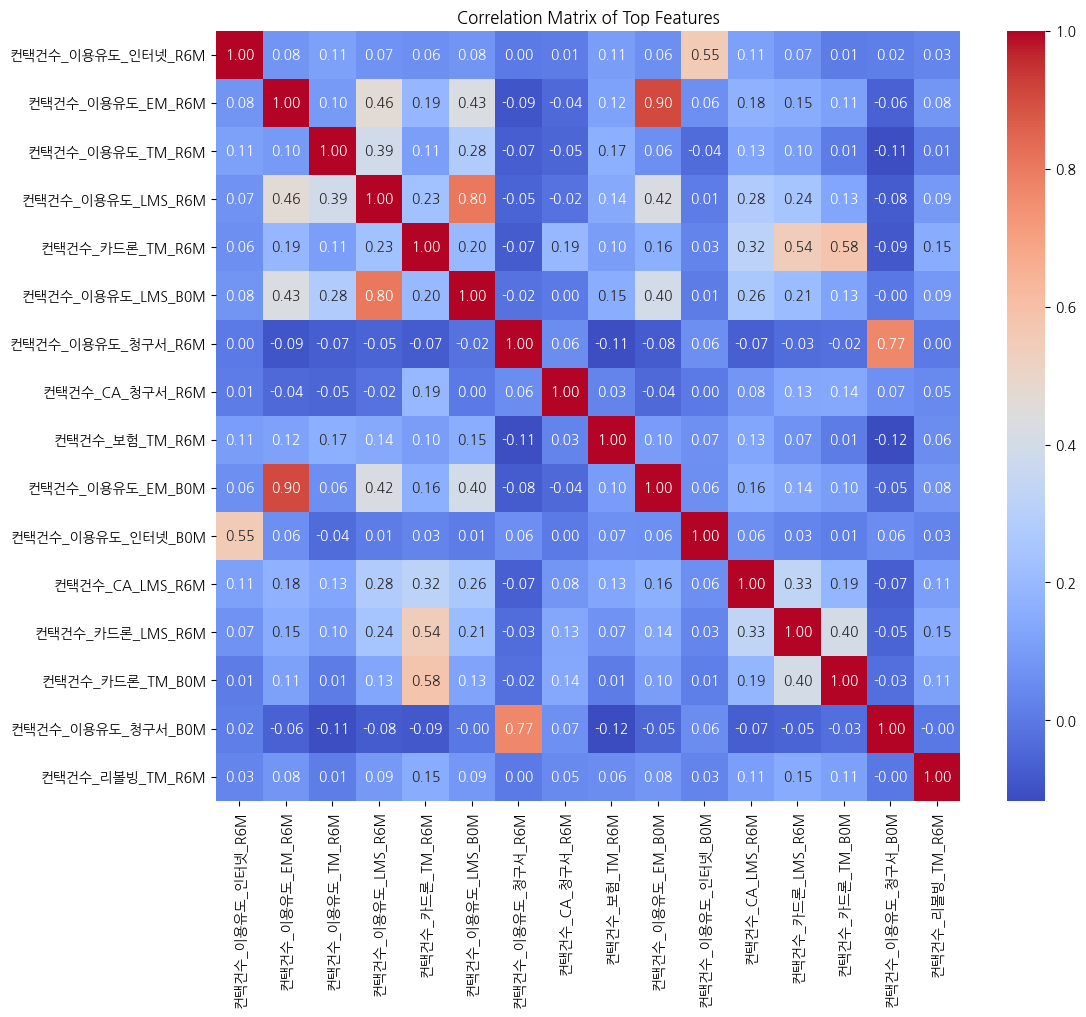


상관계수 0.8 이상인 feature 쌍:
🔹컨택건수_이용유도_EM_B0M vs 컨택건수_이용유도_EM_R6M: 상관계수 = 0.904
🔹컨택건수_이용유도_LMS_B0M vs 컨택건수_이용유도_LMS_R6M: 상관계수 = 0.805


In [24]:
# 상관계수 0.8 이상인 feature 쌍을 시각화
high_corr_pairs = plot_feature_correlation(X_top, threshold=0.8)

In [25]:
high_corr_pairs = sorted(high_corr_pairs, key=lambda x: x[2], reverse=True)
high_corr_pairs

[('컨택건수_이용유도_EM_B0M', '컨택건수_이용유도_EM_R6M', np.float64(0.9042029599126703)),
 ('컨택건수_이용유도_LMS_B0M', '컨택건수_이용유도_LMS_R6M', np.float64(0.8048092684793855))]

In [26]:
features_to_drop = set()
for f1, f2, corr in high_corr_pairs:
    if corr > 0.9:
        if f1 not in features_to_drop and f2 not in features_to_drop:
            features_to_drop.add(f1)

features_to_drop

{'컨택건수_이용유도_EM_B0M'}

In [27]:
for col in features_to_drop:
    X_top = X_top.drop(columns=[col])

X_top.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 15 columns):
 #   Column             Dtype
---  ------             -----
 0   컨택건수_이용유도_인터넷_R6M  uint8
 1   컨택건수_이용유도_EM_R6M   uint8
 2   컨택건수_이용유도_TM_R6M   uint8
 3   컨택건수_이용유도_LMS_R6M  uint8
 4   컨택건수_카드론_TM_R6M    uint8
 5   컨택건수_이용유도_LMS_B0M  uint8
 6   컨택건수_이용유도_청구서_R6M  uint8
 7   컨택건수_CA_청구서_R6M    uint8
 8   컨택건수_보험_TM_R6M     uint8
 9   컨택건수_이용유도_인터넷_B0M  uint8
 10  컨택건수_CA_LMS_R6M    uint8
 11  컨택건수_카드론_LMS_R6M   uint8
 12  컨택건수_카드론_TM_B0M    uint8
 13  컨택건수_이용유도_청구서_B0M  uint8
 14  컨택건수_리볼빙_TM_R6M    uint8
dtypes: uint8(15)
memory usage: 34.3 MB


In [28]:
filtered_market_df = market_df[['ID', '기준년월'] + X_top.columns.tolist()]
filtered_market_df.to_parquet('../dataset/train/market.parquet', index=False)

filtered_market_test_df = market_test_df[['ID', '기준년월'] + X_top.columns.tolist()]
filtered_market_test_df.to_parquet('../dataset/test/market.parquet', index=False)